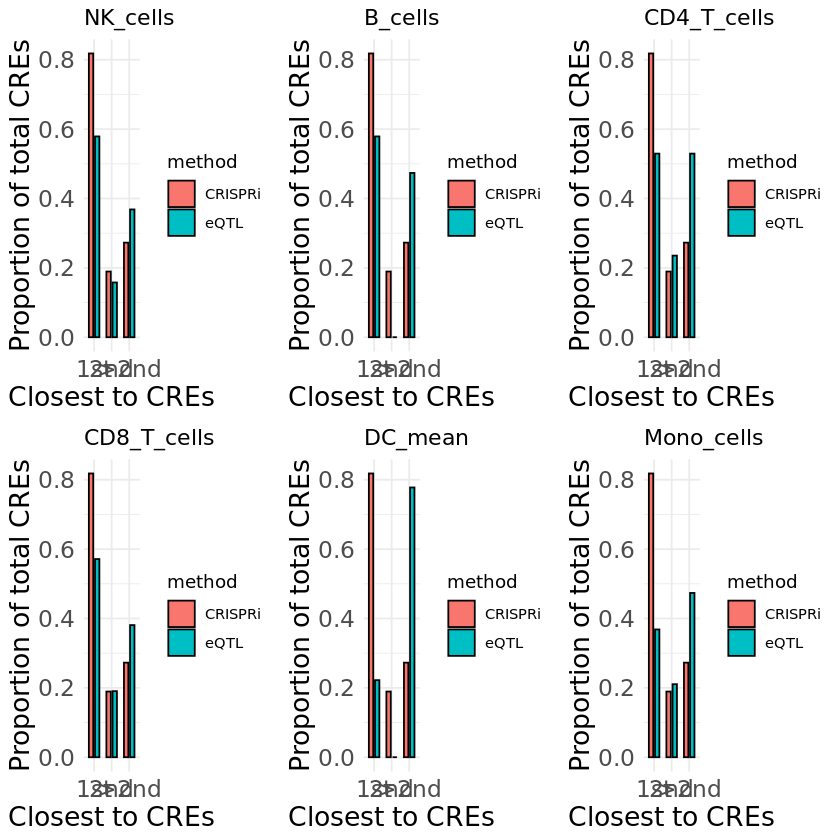

In [43]:
library(data.table)
library(tidyverse)
library(ggplot2)
library(gridExtra)

one_cgene = 0.818181818181818
two_cgene = 0.189393939393939
three_cgene = 0.272727272727273

onek_gene_dis = fread("Onek1k_gene_distance.txt") %>% filter(pval_nominal < 1e-03)
sc_cell_types = c("NK_cells", "B_cells", "CD4_T_cells", "CD8_T_cells", "DC_mean", "Mono_cells")

plot_list = list()
proportions_df = data.frame()

for (cell in sc_cell_types){

    closest_egene = onek_gene_dis %>% filter(cell_type == cell)
    one_egene = length(unique(closest_egene$gwas_variant[closest_egene$dis_rank ==1]))/length(unique(closest_egene$gwas_variant))
    two_egene = length(unique(closest_egene$gwas_variant[closest_egene$dis_rank ==2]))/length(unique(closest_egene$gwas_variant))
    three_egene = length(unique(closest_egene$gwas_variant[closest_egene$dis_rank >2]))/length(unique(closest_egene$gwas_variant))
    
    # Barplot of gene distances
    data <- data.frame(
      Rank = factor(c("1st","1st","2nd","2nd",">2nd", ">2nd"), levels = c("1st", "2nd", ">2nd")),
      method = c(rep(c("CRISPRi", "eQTL"),3)),
      percent = c(one_cgene,one_egene,two_cgene,two_egene,
                  three_cgene,three_egene))
    
    # Generate a bar plot for gene distances
    #tiff("plots/onek1k_crispr_closest_gene_barplot.tiff", width = 6, height = 10,units = "in", res = 300)
    
    p = ggplot(data, aes(x = Rank, y = percent, fill = method)) +
      geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
      theme_minimal() +
      labs(title = cell, x = "Closest to CREs", y = "Proportion of total CREs") +
      theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)
      )
    
    plot_list[[cell]] <- p

    df = data.frame(cell_type = cell,
                    prop_closest_gene = one_egene,
                    n_colocolised_variants = length(unique(closest_egene$gwas_variant)))
    proportions_df = bind_rows(proportions_df, df)
    
}

grid.arrange(grobs = plot_list, ncol = 3)

cell_type,prop_closest_gene,n_colocolised_variants
<chr>,<dbl>,<int>
NK_cells,0.5789474,19
B_cells,0.5789474,19
CD4_T_cells,0.5294118,34
CD8_T_cells,0.5714286,21
DC_mean,0.2222222,9
Mono_cells,0.3684211,19
blood,0.8135593,59
neutrophil,0.7931034,29
LCL,0.7647059,34


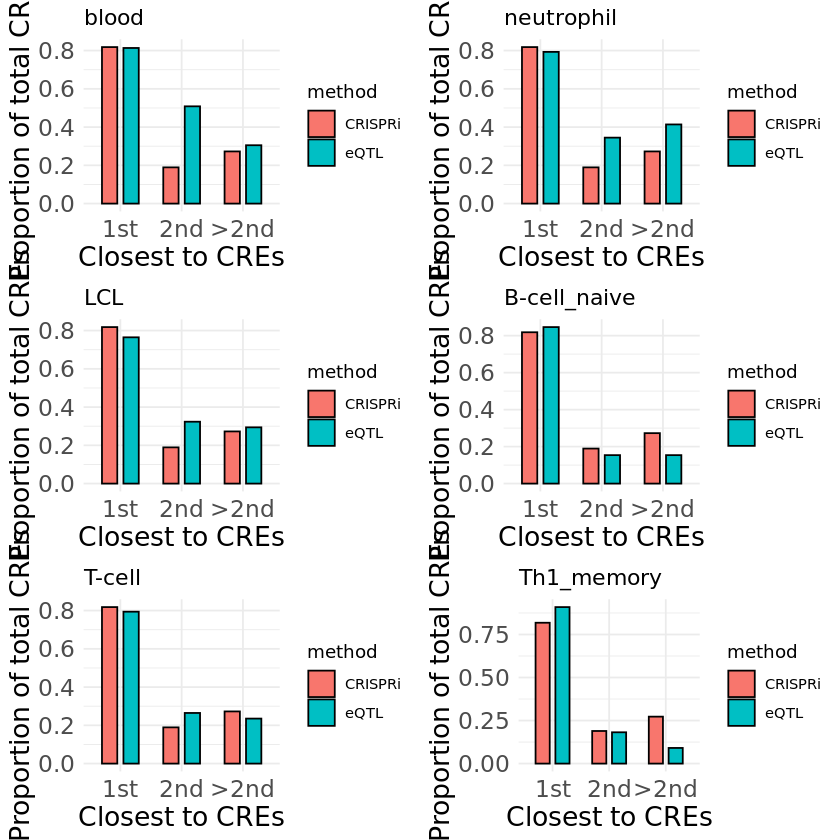

In [44]:
cat_gene_dis = fread("eQTL_gene_distances/eqtl_cat_gene_distances_formatted.txt") %>% filter(pvalue < 1e-03)

cell_types = unique(cat_gene_dis$eqtl)

plot_list = list()

for (cell in cell_types){

    closest_egene = cat_gene_dis %>% filter(eqtl == cell)
    one_egene = length(unique(closest_egene$variant[closest_egene$dis_rank ==1]))/length(unique(closest_egene$variant))
    two_egene = length(unique(closest_egene$variant[closest_egene$dis_rank ==2]))/length(unique(closest_egene$variant))
    three_egene = length(unique(closest_egene$variant[closest_egene$dis_rank >2]))/length(unique(closest_egene$variant))
    
    # Barplot of gene distances
    data <- data.frame(
      Rank = factor(c("1st","1st","2nd","2nd",">2nd", ">2nd"), levels = c("1st", "2nd", ">2nd")),
      method = c(rep(c("CRISPRi", "eQTL"),3)),
      percent = c(one_cgene,one_egene,two_cgene,two_egene,
                  three_cgene,three_egene))
    
    # Generate a bar plot for gene distances
    #tiff("plots/onek1k_crispr_closest_gene_barplot.tiff", width = 6, height = 10,units = "in", res = 300)
    
    p = ggplot(data, aes(x = Rank, y = percent, fill = method)) +
      geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
      theme_minimal() +
      labs(title = cell, x = "Closest to CREs", y = "Proportion of total CREs") +
      theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)
      )

    df = data.frame(cell_type = cell,
                    prop_closest_gene = one_egene,
                    n_colocolised_variants = length(unique(closest_egene$variant)))
    
    proportions_df = bind_rows(proportions_df, df)
    
    plot_list[[cell]] <- p
    
}

grid.arrange(grobs = plot_list[1:6], nrows = 2)
proportions_df

,cell_type,prop_closest_gene,n_colocolised_variants
,<chr>,<dbl>,<int>
5,DC_mean,0.2222222,9
34,monocyte_IAV,0.3333333,3
6,Mono_cells,0.3684211,19
3,CD4_T_cells,0.5294118,34
4,CD8_T_cells,0.5714286,21
33,macrophage_Listeria,0.5714286,7
1,NK_cells,0.5789474,19
2,B_cells,0.5789474,19
14,monocyte,0.6800000,25


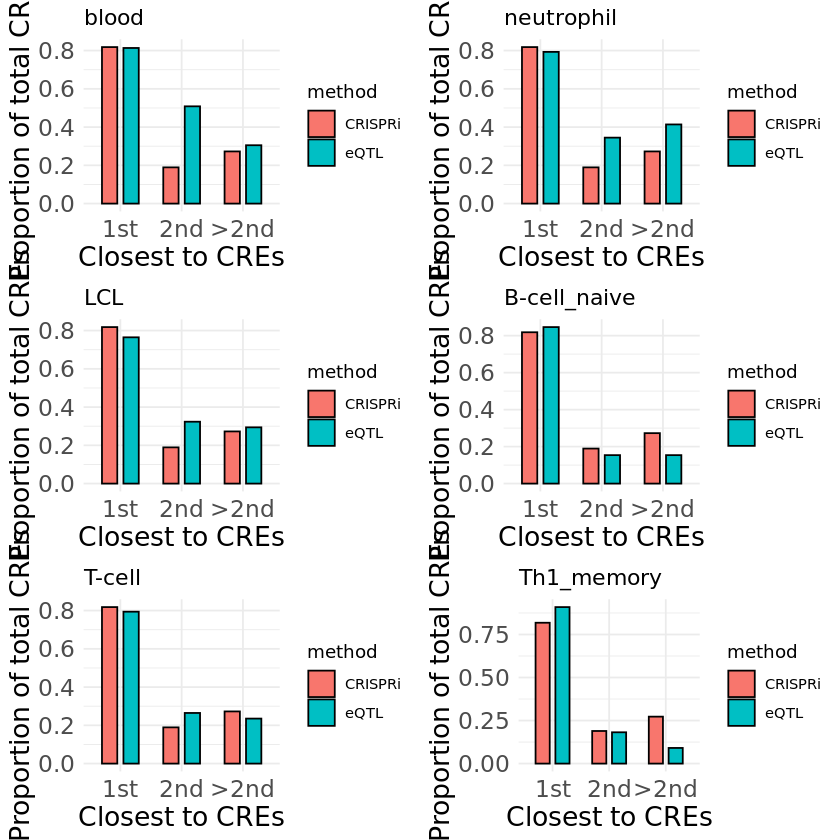

In [45]:
grid.arrange(grobs = plot_list[1:6], nrows = 2)
proportions_df[order(proportions_df$prop_closest_gene),]

cell_type,prop_closest_gene
<chr>,<dbl>
GTEx,0.5211268


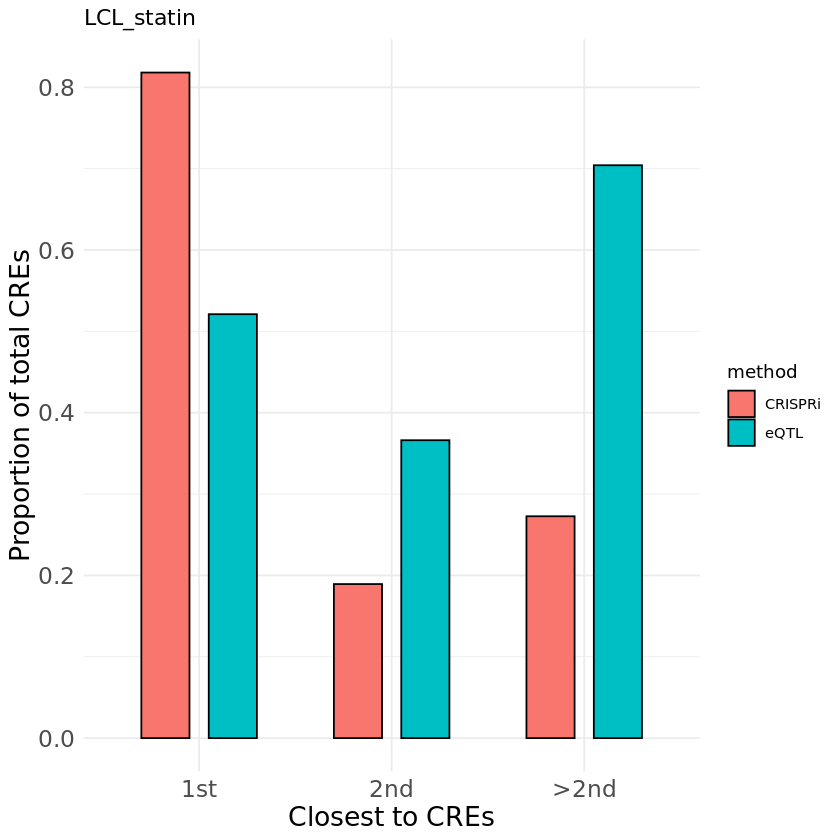

In [46]:
closest_egene = fread("eQTL_gene_distances/GTEx_gene_distance.txt") %>% filter(pval_nominal < 1e-03)
one_egene = length(unique(closest_egene$snp_hg19[closest_egene$dis_rank ==1]))/length(unique(closest_egene$snp_hg19))
two_egene = length(unique(closest_egene$snp_hg19[closest_egene$dis_rank ==2]))/length(unique(closest_egene$snp_hg19))
three_egene = length(unique(closest_egene$snp_hg19[closest_egene$dis_rank >2]))/length(unique(closest_egene$snp_hg19))
    
# Barplot of gene distances
data <- data.frame(
      Rank = factor(c("1st","1st","2nd","2nd",">2nd", ">2nd"), levels = c("1st", "2nd", ">2nd")),
      method = c(rep(c("CRISPRi", "eQTL"),3)),
      percent = c(one_cgene,one_egene,two_cgene,two_egene,
                  three_cgene,three_egene))
    
    # Generate a bar plot for gene distances
    #tiff("plots/onek1k_crispr_closest_gene_barplot.tiff", width = 6, height = 10,units = "in", res = 300)
    
p = ggplot(data, aes(x = Rank, y = percent, fill = method)) +
      geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
      theme_minimal() +
      labs(title = cell, x = "Closest to CREs", y = "Proportion of total CREs") +
      theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)
      )

df = data.frame(cell_type = "GTEx",
                    prop_closest_gene = one_egene)
    
#proportions_df = bind_rows(proportions_df, df)
p
df

In [54]:
proportions_df$cell_type <- factor(proportions_df$cell_type, levels = proportions_df$cell_type[order(proportions_df$prop_closest_gene)])

# Create the plot
p = ggplot(proportions_df, aes(x = cell_type, y = prop_closest_gene, fill = study_type)) +
      geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
      theme_minimal() +
      labs(title = "Proportion of CREs with closest gene significantly associated", x = "Cell Type", y = "Proportion of CREs") +
      theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1),  # Rotate x-axis labels for readability
        axis.text.y = element_text(size = 14)
      )
png("plots/prop_of_closest_gene.png", width = 14, height = 8,units = "in", res = 300)
# Display the plot
p
dev.off()

png 
  2